In [10]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
newsgroups_data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
print(f"Categories: {newsgroups_data.target_names}")

Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
df = pd.DataFrame({
    'text' : newsgroups_data.data,
    'target' : newsgroups_data.target
})

df['category'] = df['target'].apply(lambda x : newsgroups_data.target_names[x])

df.head()

,text,target,category
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,comp.sys.mac.hardware


In [9]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)

df.head()

,text,target,category,clean_text
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey,mamatha devineni ratnam subject pens fans reac...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware,mblawson matthew b lawson subject vlb video ca...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,talk.politics.mideast,hilmi eren subject armenia says could shoot tu...
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware,guyd guy dawson subject ide vs scsi dma detach...
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,comp.sys.mac.hardware,alexander samuel mcdiarmid subject driver orga...


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['target'], test_size=0.2, random_state=42
)

In [12]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups_data.target_names))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.83      0.82       151
           comp.graphics       0.72      0.78      0.75       202
 comp.os.ms-windows.misc       0.77      0.81      0.79       195
comp.sys.ibm.pc.hardware       0.66      0.67      0.66       183
   comp.sys.mac.hardware       0.85      0.80      0.82       205
          comp.windows.x       0.82      0.80      0.81       215
            misc.forsale       0.85      0.77      0.80       193
               rec.autos       0.90      0.89      0.89       196
         rec.motorcycles       0.96      0.92      0.94       168
      rec.sport.baseball       0.93      0.95      0.94       211
        rec.sport.hockey       0.96      0.97      0.96       198
               sci.crypt       0.96      0.95      0.95       201
         sci.electronics       0.78      0.83      0.80       202
                 sci.med       0.91      0.93      0

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

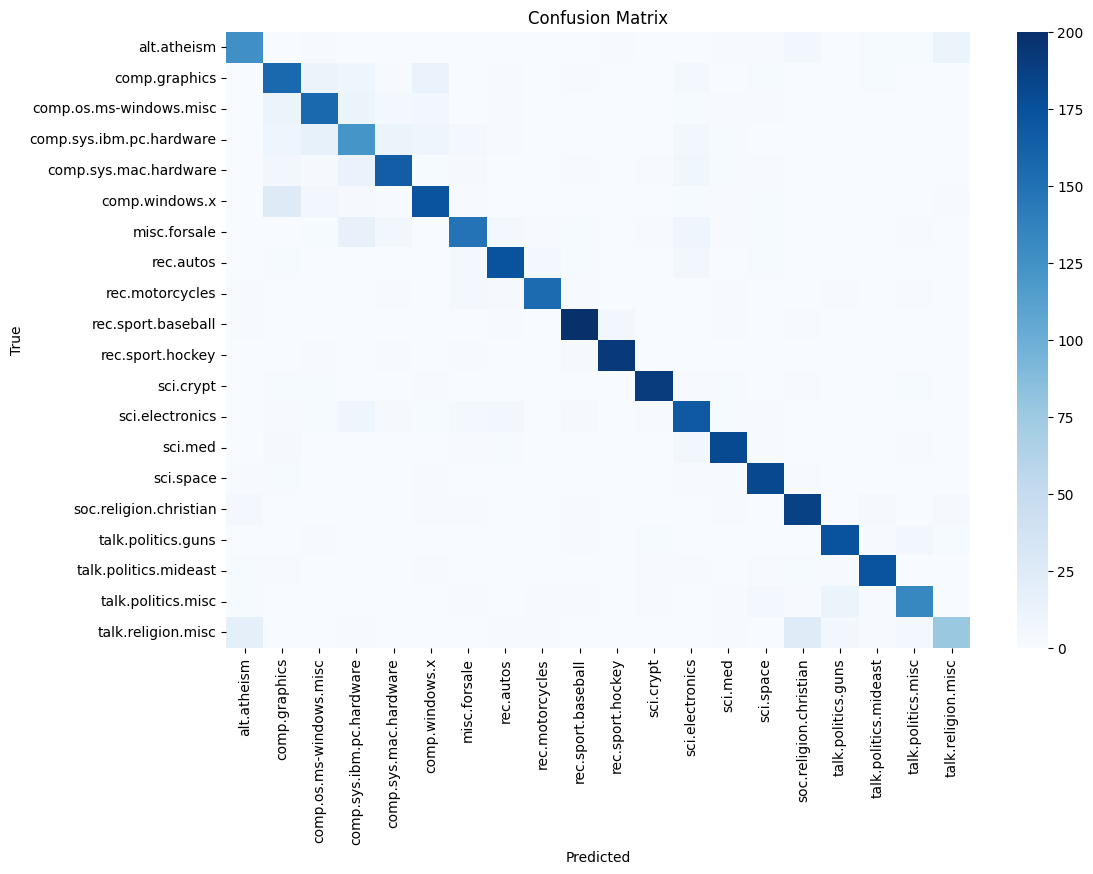

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=newsgroups_data.target_names, yticklabels=newsgroups_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
#Custom Input Test
def predict_category(text):
    clean = preprocess_text(text)
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)[0]
    return newsgroups_data.target_names[pred]

sample_text = "The government announced new policies for space exploration."
print("Predicted Category:", predict_category(sample_text))

Predicted Category: sci.space


In [21]:
import joblib

joblib.dump(model, "document_classifier_model.pkl")

joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")

✅ Model and vectorizer saved successfully!
